NLP - Author Attribution

- Data Prep
- Corpora
- Crossvalidation
- Baseline
- Classifiers

In [1]:
import pandas as pd
import nltk
import glob
import string
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import CategoricalNB


In [6]:
# Please make sure you have the following parts downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/d4ve/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Use a quick bash loop to create csv files with bag of words for all training books.
Also clean all txt files by removing portuguse accents, removing all spacing and lower the casing.

In [47]:
%%bash
rm -rf trainData/*/*tokenised.csv
rm -rf trainData/*/*clean.txt
for dir in trainData/*/; do
    for book in $dir*.txt; do
        printf "Tokenising: $book\n"
        tr -sc 'A-Za-z' '\n' < "$book" | tr A-Z a-z | sort | uniq -c | sort -nr | awk '{print $1, $2}' | tr " " "," > "${book%.*}"_tokenised.csv
        printf "Cleaning up: $book \n\n"
        iconv -f utf8 -t ascii//TRANSLIT "$book" | tr -sc 'A-Za-z0-9' ' ' | tr A-Z a-z  > "${book%.*}"_clean.txt
    done
done

Tokenising: trainData/almadaNegreiros/pg22615.txt
Cleaning up: trainData/almadaNegreiros/pg22615.txt 

Tokenising: trainData/almadaNegreiros/pg22730.txt
Cleaning up: trainData/almadaNegreiros/pg22730.txt 

Tokenising: trainData/almadaNegreiros/pg22801.txt
Cleaning up: trainData/almadaNegreiros/pg22801.txt 

Tokenising: trainData/almadaNegreiros/pg22802.txt
Cleaning up: trainData/almadaNegreiros/pg22802.txt 

Tokenising: trainData/almadaNegreiros/pg22969.txt
Cleaning up: trainData/almadaNegreiros/pg22969.txt 

Tokenising: trainData/almadaNegreiros/pg23133.txt
Cleaning up: trainData/almadaNegreiros/pg23133.txt 

Tokenising: trainData/almadaNegreiros/pg23620.txt
Cleaning up: trainData/almadaNegreiros/pg23620.txt 

Tokenising: trainData/almadaNegreiros/pg23879.txt
Cleaning up: trainData/almadaNegreiros/pg23879.txt 

Tokenising: trainData/almadaNegreiros/pg23961.txt
Cleaning up: trainData/almadaNegreiros/pg23961.txt 

Tokenising: trainData/almadaNegreiros/tesst.txt
Cleaning up: trainData/al

In [5]:
authors = {
            1: "almadaNegreiros",
            2: "ecaDeQueiros",
            3: "joseSaramago",
            4: "camiloCasteloBranco",
            5: "joseRodriguesSantos",
            6: "luisaMarquesSilva"}

# NLTK Tools
stopwords = list(nltk.corpus.stopwords.words('portuguese'))
stemmer = nltk.stem.RSLPStemmer()

# Training data paths
paths = glob.glob('trainData/*/*clean.txt')

In [8]:
def map_author(path):
    """Determine the author of a book through its ffile path."""
    for key, author in authors.items():
        if author in path:
            return key
        
def clean_doc(doc, stopwords=True):
    doc = stem_doc(doc)
    if stopwords == True:
        doc = stop_doc(doc)
    return doc

def stem_doc(doc):
    """Takes a document, splits it up and stemms each word - then
    remerges the document together and returns it."""
    doc_split = doc.split()
    stem = [stemmer.stem(str(i)) for i in doc_split]
    doc = ' '.join(stem)
    return doc

def stop_doc(doc):
    """Takes a document and removes all stopwords from it"""
    doc_split = doc.split()
    temp = [i for i in doc_split if i not in stopwords]
    doc = ' '.join(temp)
    return doc
        
def bagger(doc):
    """Takes a document and returns a bag of word representation
    of the document"""
    pass

def punct(df, path):
    """Adds punctuation as features to the DataFrame"""
    pass

def split_doc(doc, n=500):
    """Takes a document and splits it into strings
    of length n"""
    splitted_doc = []
    temp = doc.split()
    splits = len(temp) // n 
    if len(temp) % n > 0: splits += 1
    cut = n
    for i in range(splits):
        n_words = ' '.join(temp[(n*i):cut])
        splitted_doc.append(n_words)
        cut += n
    return splitted_doc

In [6]:
# A list of all documents
corpus_list = [clean_doc(open(f"{path}", "r").read()) for path in paths]

In [7]:
corpus_list[0]

'exposica amade souz card lig naval lisbo portug exist unic opinia sobr art abrang tao coloss maior recei ell imp esmag ess opinia ex mo sr dr jos figueired gag govern nao porqu est snr tenh opinia est snr sej igualh rest portug rest portug est senh mat opinia sao mesm igualh dia senh grisalh diss mei hor conhec sobr art qu acab mei hor descobr conhec senh grisalh sobr art er mesm ex mo senh dr jos figueired us par ped tosta 1 pens leit fac anedoct ant foss verdad est muit trist est fur incompetenc portug particip guerr europe horr car compatriot deduz experiment tod noss conqu descobert apen tenh sobreviv imbecil daqu indiferenc espartilh famil portugu convalesc beir mar algum rar energ mal comport aind assom ton d agu pertenc halucinad secul ja nao exist qu portugu gen secul xx desc europ condo patr entrev par dar part intelligenc indiferenc espartilh famil portugu aind nao deslac mao cim barrig poi senh exposica amade souz card lig naval lisbo document concis rac portugu secul xx 1 

In [19]:
# For each document, read it into pandas, remove stopwords and transpose the matrix.
# Then clean the dataframe up and merge it onto the main df.
for path in tokenised_paths:
    temp_df = pd.read_csv(path, header=None)
    temp_df = temp_df[~temp_df[1].isin(stopwords)].T
    temp_df.columns = temp_df.iloc[1]
    temp_df.drop(1, inplace=True)
    temp_df = stem_df(temp_df)
    temp_df['author'] = map_author(path)
    df = pd.concat([df, temp_df])

df.reset_index(drop=True, inplace=True)

df.to_csv("corpus_word_tokenised.csv")

df_auth = df.groupby(['author']).sum()


In [65]:
df = pd.DataFrame(corpus_list)
df.columns = ["text"]
word_count = df['text'].apply(lambda x: len(str(x).split(" ")))
df['word_count'] = word_count
df['author'] = [map_author(path) for path in paths]

In [9]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus_list)

In [10]:
# Print vocabulary
print(vectorizer.get_feature_names())

['00', '000', '001', '002', '005', '006', '007', '008', '00h', '00m', '01', '015', '016', '017', '01m', '02', '02h', '03', '038', '04', '041', '04532', '04m', '05', '05m', '06m', '07', '0725', '07m', '08', '08m', '09', '09602', '09m', '10', '100', '10120', '103', '104', '106', '107', '109', '10h', '11', '110', '1100', '112', '1121', '1140', '1145', '115', '11m', '12', '1201', '1211', '122', '123', '125', '12h', '13', '130', '131', '1318', '134', '1341', '135', '136', '137', '138', '1399', '13h35', '13m', '14', '1410', '141414', '143', '144', '145', '1465', '1473', '1474', '1475', '1492', '1498', '14h', '14m', '15', '150', '153', '1530', '1542', '155', '1551', '1552', '157', '1572', '1576', '158', '1582', '1583', '1588', '159', '1592', '1598', '15m', '16', '1603', '1608', '161', '1610', '1612', '1618', '1619', '162', '1620', '1621', '1624', '1625', '163', '1634', '1635', '1636', '1637', '1638', '1639', '164', '1640', '1641', '1642', '1643', '1644', '1647', '1648', '1649', '1650', '1652'

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    text_tf, dfx['author'], test_size=0.2, random_state=123)

In [30]:
X_train[:10]

<10x38351 sparse matrix of type '<class 'numpy.float64'>'
	with 32172 stored elements in Compressed Sparse Row format>

In [89]:
df_bow = pd.read_csv('trainData/corpus_word_tokenised.csv', index_col=0)
df_bow.fillna(0, inplace=True)

In [90]:
X = df_bow.drop(columns=['author'])
y = df_bow['author']

In [113]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
X = selector.fit_transform(X)

In [33]:
clf = CategoricalNB()
clf.fit(X, y)

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [115]:
clf.predict(X[1:60])

array([4, 4, 4, 4, 4, 4, 1, 4, 4, 6, 6, 6, 4, 4, 4, 6, 6, 4, 4, 2, 4, 4,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [93]:
X[2:3]

array([[4, 4, 1, 4, 3, 2, 3, 2, 0, 3, 2, 4, 0, 1, 2, 4, 1, 4, 2, 1, 4, 3,
        3, 1, 2, 1, 1, 1, 2, 0, 4, 4, 3, 3, 2, 0, 2, 4, 4, 1, 2, 2, 3, 1,
        4, 3, 3, 4, 1, 0, 2, 0, 3, 2, 3, 1, 3, 2, 3, 0, 0, 4, 0, 2, 2, 0,
        3, 2, 3, 4, 1, 3, 2, 4, 1, 2, 3, 1, 2, 1, 4, 3, 0, 2, 2, 3, 4, 3,
        4, 1, 2, 2, 4, 3, 0, 2, 2, 3, 3, 4]])

In [116]:
y[1:60]

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     6
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    2
19    2
20    2
21    2
22    2
23    3
24    3
25    3
26    3
27    3
28    3
29    3
30    3
31    3
32    3
33    3
34    3
35    5
36    5
37    5
38    5
39    5
40    5
41    5
42    5
43    4
44    4
45    4
46    4
47    4
48    4
49    4
50    4
51    4
52    4
53    4
54    4
55    4
56    4
57    4
58    4
59    4
Name: author, dtype: int64

In [17]:
from nltk.probability import FreqDist
fdist = FreqDist(corpus_list[40].split())
print(fdist)

<FreqDist with 6877 samples and 85377 outcomes>


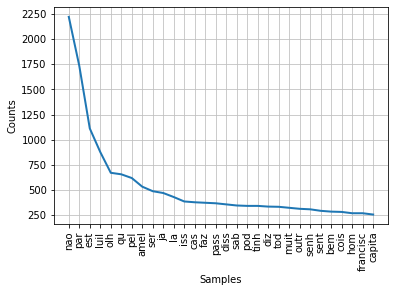

In [18]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

dfx = pd.DataFrame(corpus_list)
dfx.columns = ["text"]
word_count = dfx['text'].apply(lambda x: len(str(x).split(" ")))
dfx['word_count'] = word_count
dfx['author'] = [map_author(path) for path in paths]

tf = TfidfVectorizer()
text_tf = tf.fit_transform(dfx['text'])

In [29]:
print(X.shape)

(65, 38351)


In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)

print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.46153846153846156


AttributeError: 'MultinomialNB' object has no attribute 'show_most_informative_features'